## Testing Won't Save Us

Testing will not save us


In [1]:
import sys
# Install required packages
!{sys.executable} -mpip -q install matplotlib seaborn statsmodels pandas publicdata metapack

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import rowgenerators as rg
import publicdata as pub
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/covidtracking.com-covid19-1.2.5.csv')

states_df = pkg.resource('states').dataframe()
states_df.drop(columns=[ 'datechecked','deathincrease',
       'hospitalizedincrease', 'negativeincrease', 'positiveincrease',
       'totaltestresultsincrease'], inplace=True)
states_df['pos_rate' ] = states_df.positive / states_df.totaltestresults
states_df['date'] = pd.to_datetime(states_df.date, format='%Y%m%d', errors='coerce')
states_df.head()

,date,state,positive,negative,pending,hospitalized,death,total,totaltestresults,pos_rate
0,2020-03-26,AK,59.0,1801.0,NaN,3.0,1.0,1860,1860,0.031720
1,2020-03-26,AL,506.0,3593.0,NaN,NaN,1.0,4099,4099,0.123445
2,2020-03-26,AR,335.0,1504.0,0.0,41.0,3.0,1839,1839,0.182164
3,2020-03-26,AS,0.0,NaN,NaN,NaN,0.0,0,0,NaN
4,2020-03-26,AZ,577.0,347.0,33.0,66.0,8.0,957,924,0.624459


In [3]:
states_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending', 'hospitalized',
       'death', 'total', 'totaltestresults', 'pos_rate'],
      dtype='object')

In [4]:
# 6 states with the most tests
states = list(states_df.groupby('state').totaltestresults.mean().sort_values(ascending=False).iloc[:6].index)

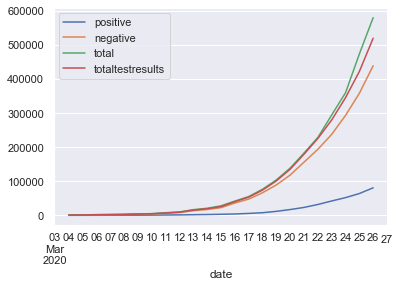

In [5]:
t = states_df.groupby('date').sum().reset_index()
t.plot(x='date',y=['positive','negative','total', 'totaltestresults'])

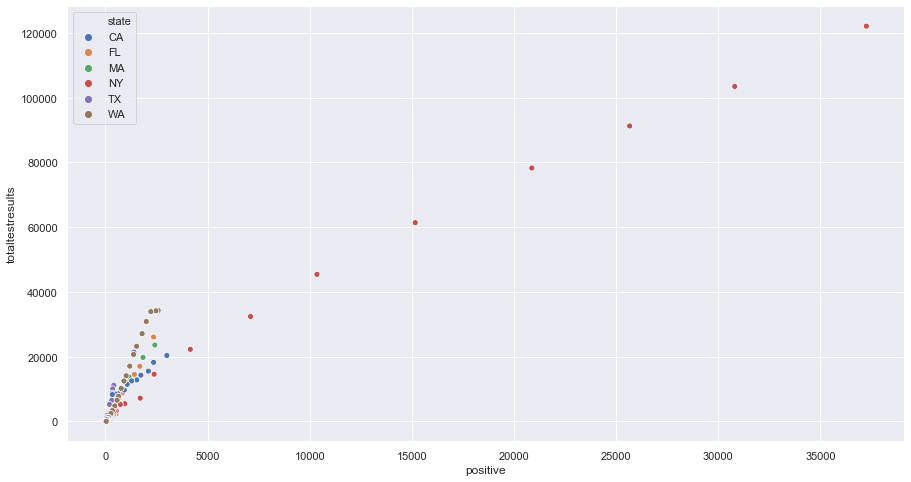

In [6]:
t = states_df.copy()
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='positive',y='totaltestresults',data=t[t.state.isin(states)], hue='state', ax=ax)


In [7]:
t = states_df.copy()
t = t[['state','positive','totaltestresults']].groupby('state').corr().unstack()
t.columns = t.columns.get_level_values(0)
t.iloc[:,1].to_frame().describe()



,positive
count,54.000000
mean,0.964986
std,0.045166
min,0.759929
25%,0.955707
50%,0.980594
75%,0.991041
max,0.999472


In [8]:
states

['NY', 'WA', 'CA', 'FL', 'MA', 'TX']

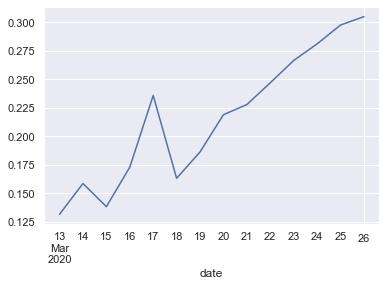

In [9]:
t = states_df[states_df.state == 'NY'].set_index('date').sort_index()
t = t.loc['2020-03-13':]
ax = t.pos_rate.plot()



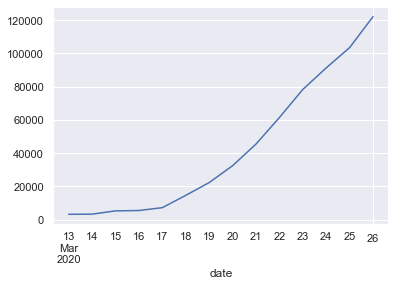

In [10]:
t.total.plot()

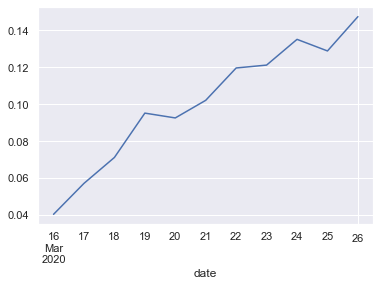

In [11]:
t = states_df[states_df.state == 'CA'].set_index('date').sort_index()
t = t.loc['2020-03-16':]
ax = t.pos_rate.plot()

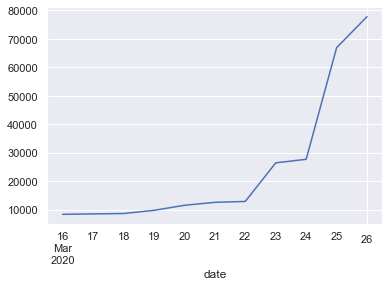

In [12]:
t.total.plot()

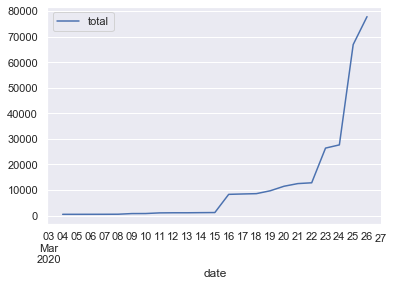

In [13]:
states_df[states_df.state == 'CA'].plot('date','total')

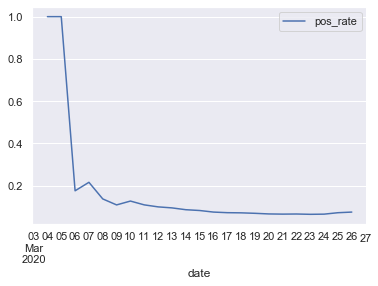

In [14]:
states_df[states_df.state == 'WA'].plot('date','pos_rate')

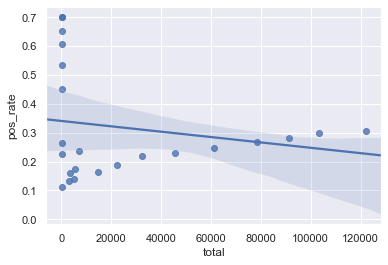

In [15]:
sns.regplot('total','pos_rate', data=states_df[states_df.state == 'NY'])